# Project



In [2]:
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import os
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

%matplotlib inline 

In [3]:
import os


# df =pd.read_csv('Stocks/a.us.txt')
# df.shape
# display(df)
for filename in os.listdir('Stocks'):
    if filename.endswith(".txt"):
        print(os.path.join('Stocks', filename))
        df =pd.read_csv(os.path.join('Stocks', filename))
        df.shape
        df=df.dropna()
        display(df)
        break
    else:
        continue

Stocks/wll.us.txt


,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,81.28,83.48,80.9200,83.40,182900,0
1,2005-02-28,85.52,87.60,82.7200,84.60,189000,0
2,2005-03-01,84.00,84.48,77.2000,80.00,458750,0
3,2005-03-02,79.80,82.60,79.8000,81.56,193550,0
4,2005-03-03,83.00,88.20,82.9200,86.92,253450,0
...,...,...,...,...,...,...,...
3196,2017-11-06,26.48,28.58,26.3200,28.32,8823853,0
3197,2017-11-07,28.24,28.32,27.6660,28.00,5463555,0
3198,2017-11-08,27.76,28.00,26.2800,26.44,6682284,0
3199,2017-11-09,25.40,28.17,25.4000,27.90,10925337,0


In [4]:
df_cboe=  pd.read_csv('cboe.csv')
display(df_cboe)


,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/2004,17.96,18.68,17.54,18.22
1,1/5/2004,18.45,18.49,17.44,17.49
2,1/6/2004,17.66,17.67,16.19,16.73
3,1/7/2004,16.72,16.75,15.50,15.50
4,1/8/2004,15.42,15.68,15.32,15.61
...,...,...,...,...,...
3532,01/12/2018,9.74,10.31,9.54,10.16
3533,01/16/2018,10.42,12.41,10.40,11.66
3534,01/17/2018,11.35,12.81,11.18,11.91
3535,01/18/2018,12.01,12.40,11.62,12.22


In [5]:
import datetime


df_cboe['Date']=df_cboe['Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime("%Y-%m-%d"))
df_cboe=df_cboe.dropna()
display(df_cboe)

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,2004-01-02,17.96,18.68,17.54,18.22
1,2004-01-05,18.45,18.49,17.44,17.49
2,2004-01-06,17.66,17.67,16.19,16.73
3,2004-01-07,16.72,16.75,15.50,15.50
4,2004-01-08,15.42,15.68,15.32,15.61
...,...,...,...,...,...
3532,2018-01-12,9.74,10.31,9.54,10.16
3533,2018-01-16,10.42,12.41,10.40,11.66
3534,2018-01-17,11.35,12.81,11.18,11.91
3535,2018-01-18,12.01,12.40,11.62,12.22


In [6]:
df_all = pd.merge(df, df_cboe, how='inner')

In [7]:
display(df_all)

,Date,Open,High,Low,Close,Volume,OpenInt,VIX Open,VIX High,VIX Low,VIX Close
0,2005-02-25,81.28,83.48,80.9200,83.40,182900,0,11.75,11.78,10.92,11.49
1,2005-02-28,85.52,87.60,82.7200,84.60,189000,0,11.89,12.50,11.73,12.08
2,2005-03-01,84.00,84.48,77.2000,80.00,458750,0,11.95,12.10,11.66,12.04
3,2005-03-02,79.80,82.60,79.8000,81.56,193550,0,12.88,12.91,12.20,12.50
4,2005-03-03,83.00,88.20,82.9200,86.92,253450,0,12.28,13.07,12.23,12.93
...,...,...,...,...,...,...,...,...,...,...,...
3196,2017-11-06,26.48,28.58,26.3200,28.32,8823853,0,9.63,9.74,9.38,9.40
3197,2017-11-07,28.24,28.32,27.6660,28.00,5463555,0,9.31,10.31,9.29,9.89
3198,2017-11-08,27.76,28.00,26.2800,26.44,6682284,0,9.79,10.27,9.50,9.78
3199,2017-11-09,25.40,28.17,25.4000,27.90,10925337,0,9.94,12.19,9.79,10.50


In [8]:
df_all=df_all.dropna()
display(df_all)

,Date,Open,High,Low,Close,Volume,OpenInt,VIX Open,VIX High,VIX Low,VIX Close
0,2005-02-25,81.28,83.48,80.9200,83.40,182900,0,11.75,11.78,10.92,11.49
1,2005-02-28,85.52,87.60,82.7200,84.60,189000,0,11.89,12.50,11.73,12.08
2,2005-03-01,84.00,84.48,77.2000,80.00,458750,0,11.95,12.10,11.66,12.04
3,2005-03-02,79.80,82.60,79.8000,81.56,193550,0,12.88,12.91,12.20,12.50
4,2005-03-03,83.00,88.20,82.9200,86.92,253450,0,12.28,13.07,12.23,12.93
...,...,...,...,...,...,...,...,...,...,...,...
3196,2017-11-06,26.48,28.58,26.3200,28.32,8823853,0,9.63,9.74,9.38,9.40
3197,2017-11-07,28.24,28.32,27.6660,28.00,5463555,0,9.31,10.31,9.29,9.89
3198,2017-11-08,27.76,28.00,26.2800,26.44,6682284,0,9.79,10.27,9.50,9.78
3199,2017-11-09,25.40,28.17,25.4000,27.90,10925337,0,9.94,12.19,9.79,10.50


In [9]:
def load_data(company, start, end):
    data = web.DataReader(company, 'yahoo', start, end)
    return data

In [10]:
data = load_data(company = 'FB',
                 start = dt.datetime(2012,1,1),
                 end = dt.datetime(2019,1,1))
display(data)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2018-12-24,129.740005,123.019997,123.099998,124.059998,22066000,124.059998
2018-12-26,134.240005,125.889999,126.000000,134.179993,39723400,134.179993
2018-12-27,134.990005,129.669998,132.440002,134.520004,31202500,134.520004


In [11]:
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
def scale(input):
    scaler = MinMaxScaler(feature_range=(0,1))
    return scaler.fit_transform(input.values)

In [13]:
vix = scale(df_all['VIX High'])
close = scale(df_all['Close'])

In [20]:
df_final= df_all[['Date','Close', 'VIX Close']]
display(df_final)


,Date,Close,VIX Close
0,2005-02-25,83.40,11.49
1,2005-02-28,84.60,12.08
2,2005-03-01,80.00,12.04
3,2005-03-02,81.56,12.50
4,2005-03-03,86.92,12.93
...,...,...,...
3196,2017-11-06,28.32,9.40
3197,2017-11-07,28.00,9.89
3198,2017-11-08,26.44,9.78
3199,2017-11-09,27.90,10.50


In [24]:
scaled_data = scaler.fit_transform(df_final[['Close', 'VIX Close']])
scaled_data.shape


(3201, 2)

In [16]:
prediction_days = 60

In [17]:
def prepData(scaled_data, prediction_days):
    x_train = []
    y_train = []

    for x in range(prediction_days, len(scaled_data)):
        x_train.append(scaled_data[x - prediction_days:x, 0])
        y_train.append(scaled_data[x, 0])
    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    print(x_train.shape)
    print(y_train.shape)
    return x_train, y_train

In [18]:
x_train, y_train = prepData(vix[:3000], prediction_days)
x_train1, y_train1 = prepData(close[:3000], prediction_days)


(2940, 60, 1)
(2940,)
(2940, 60, 1)
(2940,)


In [67]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

In [ ]:
def LSTM2_model():
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],2)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

In [68]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20, 50)            10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 20, 50)            20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [69]:
# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                               verbose = 2, 
                               save_best_only = True)

model.fit(x_train, 
          y_train, 
          epochs=25, 
          batch_size = 32,
          callbacks = [checkpointer])

Epoch 1/25
94/94 [==============================] - 5s 20ms/step - loss: 0.0080
Epoch 2/25
94/94 [==============================] - 2s 19ms/step - loss: 0.0023
Epoch 3/25
94/94 [==============================] - 2s 21ms/step - loss: 0.0023
Epoch 4/25
94/94 [==============================] - 2s 21ms/step - loss: 0.0023
Epoch 5/25
94/94 [==============================] - 2s 20ms/step - loss: 0.0018
Epoch 6/25
94/94 [==============================] - 2s 20ms/step - loss: 0.0017
Epoch 7/25
94/94 [==============================] - 2s 21ms/step - loss: 0.0018
Epoch 8/25
94/94 [==============================] - 2s 21ms/step - loss: 0.0015
Epoch 9/25
94/94 [==============================] - 2s 20ms/step - loss: 0.0018
Epoch 10/25
94/94 [==============================] - 2s 21ms/step - loss: 0.0013
Epoch 11/25
94/94 [==============================] - 2s 20ms/step - loss: 0.0013
Epoch 12/25
94/94 [==============================] - 2s 20ms/step - loss: 0.0013
Epoch 13/25
94/94 [==================

In [70]:
test_data = df_all['Close'][3001:]

actual_prices = test_data.values

model_inputs = df_all['Close'][len(df_all) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

In [71]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

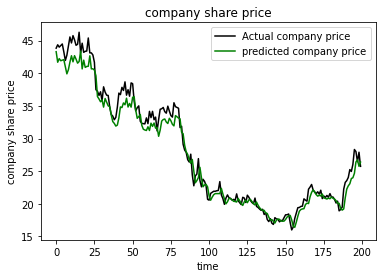

In [72]:
plt.plot(actual_prices, color='black', label=f"Actual company price")
plt.plot(predicted_prices, color= 'green', label=f"predicted company price")
plt.title(f"company share price")
plt.xlabel("time")
plt.ylabel(f"company share price")
plt.legend()
plt.show()

In [10]:
def stocks_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    for symbol in symbols:
        df_temp = pd.read_csv("./Stocks/{}.us.txt".format(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)
    return df

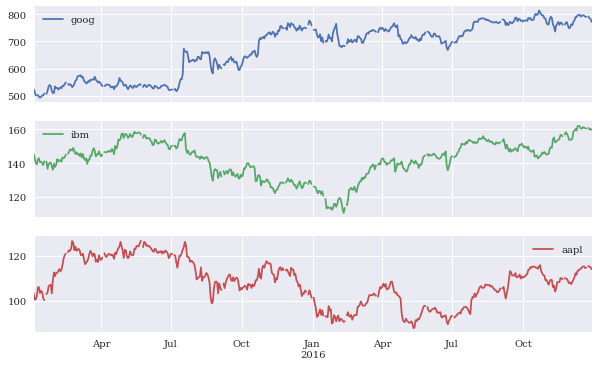

In [11]:
dates = pd.date_range('2015-01-02','2016-12-31',freq='B')
symbols = ['goog','ibm','aapl']
df = stocks_data(symbols, dates)
df.fillna(method='pad')
df.plot(figsize=(10, 6), subplots=True);